# 파일 - 다운로드(.ipynb 다운로드) 후 본인 작업폴더에 저장하고
# 파일 이름은 본인이름.ipynb로 수정후 작성하고 제출하세요

In [35]:
import warnings
warnings.filterwarnings('ignore')

### 1. 202302_202302_주민등록인구및세대현황_월간.csv를 가지고 와서 'data'라는 이름의 데이터 프레임으로 작성하고 5개만 확인합니다.

In [36]:
import pandas as pd

In [37]:
data = pd.read_csv('202302_202302_주민등록인구및세대현황_월간.csv', encoding='cp949')

In [38]:
data.sample(5)

,행정구역,2023년02월_총인구수,2023년02월_세대수,2023년02월_세대당 인구,2023년02월_남자 인구수,2023년02월_여자 인구수,2023년02월_남여 비율
1613,경기도 오산시 신장동(4137054000),"60,386","25,595",2.36,"30,578","29,808",1.03
677,대구광역시 중구 삼덕동(2711054500),"6,407","4,093",1.57,"3,062","3,345",0.92
199,서울특별시 은평구 역촌동(1138062500),"44,533","20,792",2.14,"20,926","23,607",0.89
856,인천광역시 미추홀구 숭의1.3동(2817752000),"15,852","7,548",2.10,"7,876","7,976",0.99
3079,전라남도 완도군 청산면(4689035000),"2,043","1,209",1.69,"1,006","1,037",0.97


### 2. '행정구역'컬럼을 행정구역명과 행정기관코드로 분리하여 'data' 데이터 프레임에 '행정구역' 컬럼에 행정구역명만 저장하고 5개의 데이터만 확인합니다.

In [39]:
data['행정구역'] = data['행정구역'].str.split('(').str[0]

In [40]:
data.sample(5)

,행정구역,2023년02월_총인구수,2023년02월_세대수,2023년02월_세대당 인구,2023년02월_남자 인구수,2023년02월_여자 인구수,2023년02월_남여 비율
3430,경상북도 성주군 선남면,"6,143","3,579",1.72,"3,358","2,785",1.21
3473,경상북도 울진군 울진읍,"13,600","6,269",2.17,"6,869","6,731",1.02
2455,충청남도 서천군 마서면,"4,666","2,621",1.78,"2,305","2,361",0.98
2011,강원도 삼척시 미로면,"1,791","1,046",1.71,930,861,1.08
1402,경기도 안양시 만안구 안양5동,"10,092","4,914",2.05,"5,037","5,055",1.00


### 3. 'data' 데이터 프레임의 컬럼명을 행정구역, 총인구수, 세대수, 세대당인구, 남자, 여자, 남녀비율 로 변경하고 'data'데이터 프레임의 정보를 확인합니다.

In [41]:
data.columns=['행정구역', '총인구수', '세대수', '세대당인구', '남자', '여자', '남녀비율']

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    3872 non-null   object 
 1   총인구수    3872 non-null   object 
 2   세대수     3872 non-null   object 
 3   세대당인구   3872 non-null   float64
 4   남자      3872 non-null   object 
 5   여자      3872 non-null   object 
 6   남녀비율    3872 non-null   float64
dtypes: float64(2), object(5)
memory usage: 211.9+ KB


### 4. 남녀비율 컬럼을 제거하고 'data' 데이터프레임 정보를 확인합니다.

In [43]:
data = data.drop(columns='남녀비율')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    3872 non-null   object 
 1   총인구수    3872 non-null   object 
 2   세대수     3872 non-null   object 
 3   세대당인구   3872 non-null   float64
 4   남자      3872 non-null   object 
 5   여자      3872 non-null   object 
dtypes: float64(1), object(5)
memory usage: 181.6+ KB


### 5. 행정구역 컬럼의 ‘(’ ‘)’를 제거하고 시,구,동 컬럼을 만들어 분리해 넣고 세종특별자치시 지역의 값만 선택해서 'sejong' 데이터 프레임에 저장합니다.

In [45]:
data['시'] = data['행정구역'].str.split(' ').str[0]
data['동'] = data['행정구역'].str.split(' ').str[2]

In [46]:
Sejong = data[data['시'] == '세종특별자치시']
Sejong

,행정구역,총인구수,세대수,세대당인구,남자,여자,시,동
1253,세종특별자치시,"385,285","160,012",2.41,"192,110","193,175",세종특별자치시,
1254,세종특별자치시,"385,285","160,012",2.41,"192,110","193,175",세종특별자치시,
1255,세종특별자치시 조치원읍,"42,117","20,785",2.03,"21,934","20,183",세종특별자치시,조치원읍
1256,세종특별자치시 연기면,"2,583","1,575",1.64,"1,480","1,103",세종특별자치시,연기면
1257,세종특별자치시 연동면,"2,945","1,683",1.75,"1,543","1,402",세종특별자치시,연동면
1258,세종특별자치시 부강면,"5,834","3,260",1.79,"3,228","2,606",세종특별자치시,부강면
1259,세종특별자치시 금남면,"8,601","4,786",1.80,"4,607","3,994",세종특별자치시,금남면
1260,세종특별자치시 장군면,"6,901","4,255",1.62,"4,046","2,855",세종특별자치시,장군면
1261,세종특별자치시 연서면,"7,177","3,898",1.84,"3,948","3,229",세종특별자치시,연서면
1262,세종특별자치시 전의면,"5,472","3,066",1.78,"2,912","2,560",세종특별자치시,전의면


### 6. 'sejong' 데이터 프레임에 NAN 값이 있다면 해당 행을 제거하고, 기존 인덱스 값은 제거하고 새로 인덱스를 부여하고 내용을 확인합니다.

In [47]:
print(Sejong.isna().sum())
Sejong = Sejong.reset_index(drop=True).drop(0).drop(1).reset_index(drop=True)
Sejong

행정구역     0
총인구수     0
세대수      0
세대당인구    0
남자       0
여자       0
시        0
동        0
dtype: int64


,행정구역,총인구수,세대수,세대당인구,남자,여자,시,동
0,세종특별자치시 조치원읍,"42,117","20,785",2.03,"21,934","20,183",세종특별자치시,조치원읍
1,세종특별자치시 연기면,"2,583","1,575",1.64,"1,480","1,103",세종특별자치시,연기면
2,세종특별자치시 연동면,"2,945","1,683",1.75,"1,543","1,402",세종특별자치시,연동면
3,세종특별자치시 부강면,"5,834","3,260",1.79,"3,228","2,606",세종특별자치시,부강면
4,세종특별자치시 금남면,"8,601","4,786",1.80,"4,607","3,994",세종특별자치시,금남면
5,세종특별자치시 장군면,"6,901","4,255",1.62,"4,046","2,855",세종특별자치시,장군면
6,세종특별자치시 연서면,"7,177","3,898",1.84,"3,948","3,229",세종특별자치시,연서면
7,세종특별자치시 전의면,"5,472","3,066",1.78,"2,912","2,560",세종특별자치시,전의면
8,세종특별자치시 전동면,"3,245","1,917",1.69,"1,742","1,503",세종특별자치시,전동면
9,세종특별자치시 소정면,"2,204","1,152",1.91,"1,177","1,027",세종특별자치시,소정면


### 7. 총인구수, 남자, 여자 컬럼의 데이타 타입을 정수형으로 변경하고 변경내용을 확인합니다.

In [48]:
Sejong['남자'] = Sejong['남자'].str.replace(',', '').astype(int)
Sejong['여자'] = Sejong['여자'].str.replace(',', '').astype(int)
Sejong['총인구수'] = Sejong['총인구수'].str.replace(',', '').astype(int)

In [49]:
Sejong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    22 non-null     object 
 1   총인구수    22 non-null     int32  
 2   세대수     22 non-null     object 
 3   세대당인구   22 non-null     float64
 4   남자      22 non-null     int32  
 5   여자      22 non-null     int32  
 6   시       22 non-null     object 
 7   동       22 non-null     object 
dtypes: float64(1), int32(3), object(4)
memory usage: 1.2+ KB


### 8. 읍면동별로 세종 인구를 차트로 표시합니다.(인구순 5개만)

In [50]:
Sejong

,행정구역,총인구수,세대수,세대당인구,남자,여자,시,동
0,세종특별자치시 조치원읍,42117,"20,785",2.03,21934,20183,세종특별자치시,조치원읍
1,세종특별자치시 연기면,2583,"1,575",1.64,1480,1103,세종특별자치시,연기면
2,세종특별자치시 연동면,2945,"1,683",1.75,1543,1402,세종특별자치시,연동면
3,세종특별자치시 부강면,5834,"3,260",1.79,3228,2606,세종특별자치시,부강면
4,세종특별자치시 금남면,8601,"4,786",1.80,4607,3994,세종특별자치시,금남면
5,세종특별자치시 장군면,6901,"4,255",1.62,4046,2855,세종특별자치시,장군면
6,세종특별자치시 연서면,7177,"3,898",1.84,3948,3229,세종특별자치시,연서면
7,세종특별자치시 전의면,5472,"3,066",1.78,2912,2560,세종특별자치시,전의면
8,세종특별자치시 전동면,3245,"1,917",1.69,1742,1503,세종특별자치시,전동면
9,세종특별자치시 소정면,2204,"1,152",1.91,1177,1027,세종특별자치시,소정면


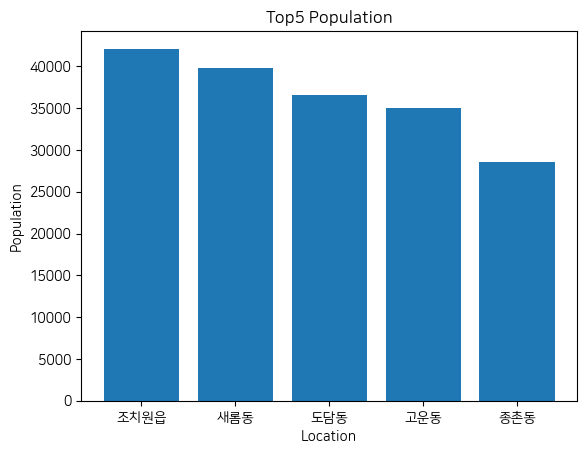

In [51]:
import matplotlib.pyplot as plt

Sejong = Sejong.sort_values(by='총인구수', ascending=False)
Top5 = Sejong.head(5)

plt.bar(Top5['동'], Top5['총인구수'])
plt.xlabel('Location')
plt.ylabel('Population')
plt.title('Top5 Population')
plt.show()

### 9. Choropleth, geojson 등을 이용하여 세종특별자치시의 동별 인구수를 색상별로 지도에 나타내시오

In [55]:
import folium
import json
jsonfile = open('HangJeongDong_ver20230101.geojson','r',encoding='utf8')
jsondata = json.load(jsonfile)

jsondata_sejong = {'type':'FeatureCollection'}
jsondata_pick=[]
for item in jsondata['features']:
    if item['properties']['sidonm'] == '세종특별자치시':
        dong = item['properties']['adm_nm'].split()[-1].strip()
        item['id'] = dong
        jsondata_pick.append(item)
jsondata_sejong['features'] = jsondata_pick

with open ('sejong_geojson.json','w')as f:
    json.dump(jsondata_sejong,f)



map =folium.Map((36.56,127.26), zoom_start=11)
hdata=open('sejong_geojson.json','r')
jsondata=json.load(hdata)
folium.Choropleth(geo_data=jsondata,
                  data=Sejong,
                  key_on='feature.id',
                  bin=5,
                  columns=['동', '총인구수'],
                  legend_name='Population',
                  ).add_to(map)

map
